LDA ile Konu modellemesi

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("e-ticaret_urun_yorumlari.csv", delimiter=';')
df.head(3)

,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1


In [2]:
#Sadece metin sütunun kullanılması, konu modelleme için yeterli olacaktır.
yorum_veriseti=df[["Metin"]]
yorum_veriseti.head(3)

,Metin
0,evet anlatıldığı gibi
1,Daha öncede almıştım bu cihazdan ense ve sakal...
2,Ürün gayet başarılı sakal kesmede başlık sayıs...


In [3]:
#veri temizleme işlemi için bir fonksiyon hazırlanması
import re 
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

nok_isaretleri= string.punctuation
etkisiz_kelimeler= stopwords.words('turkish')
etkisiz_kelimeler.extend (["bir", "kadar", "sonra"])

def veriTemizleme(metin):
    metin=metin.lower()
    metin=metin.replace("\\n"," ")
    #kesme işareti ve sonrasındaki karakterlerin aldırılması
    metin=re.sub("'(\w+)", "", metin)
    metin=re.sub("’(\w+)", "", metin)
    #sayıların kaldırılması
    metin=re.sub("[0-9]+", "", metin)
    #noktalama işaretlerinin kaldırılması
    metin="".join(list(map(lambda x:x if x not in nok_isaretleri else " " , metin)))
    #etkisiz kelimelerin bazılarının kaldırılması
    metin=" ".join([i for i in metin.split() if i not in etkisiz_kelimeler])
    #metinde tek kalan harflerin çıkarılması
    metin=" ".join([i for i in metin.split() if len(i) > 1])

    return metin
    



[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Gülseren/nltk_data'
    - 'c:\\Users\\Gülseren\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\Gülseren\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\Gülseren\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Gülseren\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Temizlenmemiş veri seti
print("Temizlenmemiş Veri Seti:")
print(df["Metin"].head(3))

# Temizlenmiş veri seti
print("\nTemizlenmiş Veri Seti:")
temizlenen_metin = yorum_veriseti["Metin"].apply(veriTemizleme)
print(temizlenen_metin.head(3))


Temizlenmemiş Veri Seti:
0                                evet anlatıldığı gibi
1    Daha öncede almıştım bu cihazdan ense ve sakal...
2    Ürün gayet başarılı sakal kesmede başlık sayıs...
Name: Metin, dtype: object

Temizlenmiş Veri Seti:
0                                     evet anlatıldığı
1    öncede almıştım cihazdan ense sakal tüketmek o...
2    ürün gayet başarılı sakal kesmede başlık sayıs...
Name: Metin, dtype: object


In [ ]:
# Tokenize etme
yorum_veriseti["temizlenen_metin_token"] = yorum_veriseti["Metin"].apply(lambda x: x.split())
yorum_veriseti.head(10)


NameError: name 'yorum_veriseti' is not defined

In [ ]:
# kelimelerdeki çekim eklerinden kurtararak kelimelerin sözlükteki hallerine göre sıralanmasını sağlamak amacı ile sadece lemmatization işlemi yapılır


yorum_veriseti["temizlenen_metin_token"] = yorum_veriseti["Metin"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
yorum_veriseti.head(10)

NameError: name 'yorum_veriseti' is not defined

In [ ]:
#LDA Model Eğitimi
import gensim
import pyLDAvis.gensim 

# Kelime listesi - Dict oluşturulması
tokenlasmis_metinler = yorum_veriseti["temizlenen_metin_token"]

# Kelime listesi Filtreleme
kelime_listesi = gensim.corpora.Dictionary(tokenlasmis_metinler)

# Terimlerin Vektörletirilmesi (Doküman-Terim matrisinin oluşturulması)
dokuman_terim_matrisi = [kelime_listesi.doc2bow(terim) for terim in tokenlasmis_metinler]


In [ ]:
#LDA MODEL
lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                            id2word = kelime_listesi,
                                            num_topics = 15,
                                            passes = 10)

In [ ]:
#Oluşturulan soyut konular içinde en fazla bulunan terimler
konular = lda_model.print_topics(num_words=7)
for konu in konular:
    print(konu)

(0, '0.049*"urun" + 0.043*"cok" + 0.031*"guzel" + 0.028*"elime" + 0.027*"sesi" + 0.025*"icin" + 0.018*"ama"')
(1, '0.105*"tavsiye" + 0.042*"ederim" + 0.034*"etmem" + 0.030*"eder" + 0.028*"idare" + 0.028*"kesinlikle" + 0.022*"ediyorum"')
(2, '0.051*"beğenmedim" + 0.042*"değil" + 0.036*"hiç" + 0.036*"dandik" + 0.027*"Hiç" + 0.027*"hemen" + 0.025*"almayın"')
(3, '0.058*"için" + 0.038*"para" + 0.027*"etmez" + 0.018*"sakal" + 0.016*"ağır" + 0.015*"ideal" + 0.013*"5"')
(4, '0.115*"ürün" + 0.101*"bir" + 0.027*"gibi" + 0.021*"ve" + 0.020*"bu" + 0.018*"kaliteli" + 0.018*"gelmedi"')
(5, '0.071*"geldi" + 0.061*"ama" + 0.040*"numara" + 0.039*"küçük" + 0.031*"siyah" + 0.030*"beyaz" + 0.029*"biraz"')
(6, '0.094*"almayın" + 0.059*"kötü" + 0.056*"berbat" + 0.039*"hem" + 0.032*"sakın" + 0.017*"arkadaşlar" + 0.015*"ürünün"')
(7, '0.050*"aldım" + 0.047*"??" + 0.043*"tane" + 0.028*"verdim" + 0.028*"için" + 0.027*"sipariş" + 0.026*"çok"')
(8, '0.111*"iade" + 0.095*"gibi" + 0.041*"ettim" + 0.038*"geri" + 0.

In [ ]:
# Tutarlılık (Coherence) skoru ile en iyi konu sayısı seçimi
from gensim.models import CoherenceModel

tutarlilik_skorlar_listesi = []
konu_sayisi_listesi = []
konu_sayisi_aralik_listesi = [5, 10, 15, 20, 25]

for konu_sayisi in konu_sayisi_aralik_listesi:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=dokuman_terim_matrisi,
                                                id2word=kelime_listesi,
                                                num_topics=konu_sayisi,
                                                passes=10)

    tutarlilik_model_lda = CoherenceModel(model=lda_model, texts=tokenlasmis_metinler,
                                          dictionary=kelime_listesi, coherence='c_v')

    gecici_tutarlilik_skoru_lda = tutarlilik_model_lda.get_coherence()
    tutarlilik_skorlar_listesi.append(gecici_tutarlilik_skoru_lda)
    konu_sayisi_listesi.append(konu_sayisi)


[5, 10, 15, 20, 25]
[0.4576846236592826, 0.39186635410749704, 0.4098468423278024, 0.45001889946184076, 0.45588055644985653]


<function matplotlib.pyplot.show(close=None, block=None)>

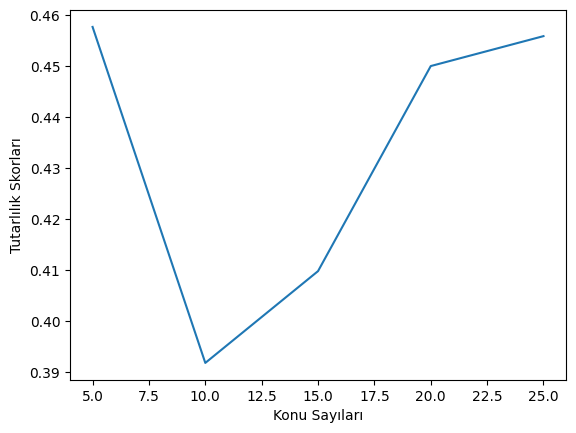

In [ ]:
#Tutarlılık skoru görselleştirme
import matplotlib.pyplot as plt

plt.plot(konu_sayisi_listesi, tutarlilik_skorlar_listesi,"-")
plt.xlabel("Konu Sayıları")
plt.ylabel("Tutarlılık Skorları")

plt.show

In [ ]:
#Oluşturulan soyut konular içinde en fazla bulunan terimler

konular = lda_model.print_topics(num_words=7)
konular = sorted(konular, key= lambda x : x[0])
for konu in konular:
    print(konu)

(0, '0.074*"kırık" + 0.050*"zor" + 0.028*"olduğunu" + 0.025*"ucuz" + 0.024*"olsa" + 0.021*"rahatsız" + 0.019*"geldiğinde"')
(1, '0.053*"plastik" + 0.048*"pişman" + 0.045*"oldum" + 0.032*"bitiyor" + 0.030*"dar" + 0.028*"malesef" + 0.027*"düşük"')
(2, '0.090*"etmem" + 0.051*"tavsiye" + 0.038*"iş" + 0.035*"yoktu" + 0.022*"yapıyor" + 0.020*"rezalet" + 0.020*"Hızlı"')
(3, '0.162*"cok" + 0.081*"urun" + 0.050*"guzel" + 0.040*"icin" + 0.033*"yazık" + 0.030*"ama" + 0.029*"aldim"')
(4, '0.128*"değil" + 0.085*"çok" + 0.063*"ama" + 0.055*"küçük" + 0.054*"gibi" + 0.042*"hiç" + 0.039*"kalitesi"')
(6, '0.114*"iyi" + 0.087*"göre" + 0.046*"bir" + 0.045*"çok" + 0.041*"fiyatına" + 0.034*"ürün" + 0.033*"gayet"')
(8, '0.045*"bir" + 0.033*"yok" + 0.030*"ama" + 0.027*"ve" + 0.026*"bu" + 0.024*"çok" + 0.022*"kadar"')
(9, '0.063*"beğenmedim" + 0.055*"para" + 0.046*"etmez" + 0.041*"farklı" + 0.024*"beş" + 0.022*"bir" + 0.019*"model"')
(10, '0.086*"." + 0.062*"Hiç" + 0.052*"memnun" + 0.043*"ışık" + 0.032*"hediye

In [7]:
#DUYGU ANALİZİ


import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()
yorum_veriseti["Metin"].apply(lambda x: x.upper())

yorum_veriseti["Metin"][0:10].apply(lambda x: sia.polarity_scores(x))
yorum_veriseti["polarity_score"]=yorum_veriseti["Metin"].apply(lambda x: sia.polarity_scores(x)["compound"])
yorum_veriseti.head() # müşteri yorumlarının polarity skoruna göre olumlu(1) ve olumsuz(0) olduğunu görebiliriz


#DUYGU MODELLEMESİ(pozitif-negatif etiketleme)
yorum_veriseti["Metin"][0:10].apply(lambda x: "positive" if sia.polarity_scores(x)["compound"] > 0 else "negative")
#yorum eğer ki 1 değerini almış ise positive; yok eğer 0 değerini almış ise negative olarak modellemesini istiyoruz. Sonrasında bunu tüm dataset e uyguluyoruz
yorum_veriseti["sentiment_label"]= yorum_veriseti["Metin"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
yorum_veriseti.head(20)


#pozitif-negatif dağılımına bakmak için
yorum_veriseti.groupby("sentiment_label")["Durum"].mean()


#Gruplama işlemini yaptıktan sonra Sentiment Label sütununu Label Encoder kullanarak sayısallaştırma işlemi yaptık.
#  Daha sonrasında, yorumların bulunduğu Review sütununu X ve Sentiment Label sütununu da Y ekseni olarak aldık .
#  Bu işlem daha sonra kelimeleri vektör haline getirmek için kullanacak olduğumuz Vectorizer yönteminde girdi olarak kullanılacaktır

# X = df['Metin']
# y = df['sentiment_label']     #?

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gülseren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gülseren\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'Column not found: Durum'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Örnek veri seti ve etiketleri
X = df['Metin']
y = df['Durum']  # 'Etiket' sütunu, sınıfları içermelidir.

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi sayısal formata dönüştürme
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes sınıflandırma modelini eğitme
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_vec)

# Sınıflandırma raporu ve doğruluk değeri
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1370
           1       0.87      0.96      0.91      1384
           2       0.61      0.24      0.34       280

    accuracy                           0.88      3034
   macro avg       0.80      0.71      0.73      3034
weighted avg       0.87      0.88      0.86      3034

Doğruluk (Accuracy): 0.8800263678312459


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Örnek veri seti ve etiketleri
X = df['Metin']
y = df['Durum']  # 'Etiket' sütunu, sınıfları içermelidir.

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi sayısal formata dönüştürme
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# LogisticRegression sınıflandırma modelini eğitme
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_vec)

# Sınıflandırma raporu ve doğruluk değeri
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1370
           1       0.91      0.95      0.93      1384
           2       0.60      0.51      0.55       280

    accuracy                           0.89      3034
   macro avg       0.81      0.79      0.80      3034
weighted avg       0.89      0.89      0.89      3034

Doğruluk (Accuracy): 0.8915622940013184


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vektörleştirici ve SVM sınıflandırıcıyı içeren bir pipeline oluşturun
model = make_pipeline(TfidfVectorizer(), SVC(C=1.0, kernel='linear', gamma='auto'))

# Modeli eğitin
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1370
           1       0.92      0.94      0.93      1384
           2       0.61      0.50      0.55       280

    accuracy                           0.89      3034
   macro avg       0.81      0.79      0.80      3034
weighted avg       0.89      0.89      0.89      3034

Doğruluk (Accuracy): 0.8932102834541858


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vektörleştirici ve LinearSVC sınıflandırıcıyı içeren bir pipeline oluşturun
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# Grid Search için parametreler
param_grid = {
    'tfidf__max_features': [1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
}

# Grid Search ve Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri göster
print("En İyi Parametreler:", grid_search.best_params_)

# En iyi modeli kullanarak test seti üzerinde tahmin yapın
y_pred = grid_search.predict(X_test)

# Model performansını değerlendirin
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


En İyi Parametreler: {'clf__C': 1, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1370
           1       0.92      0.95      0.94      1384
           2       0.65      0.49      0.56       280

    accuracy                           0.91      3034
   macro avg       0.83      0.80      0.81      3034
weighted avg       0.90      0.91      0.90      3034

Doğruluk (Accuracy): 0.9060646011865524
